In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data = pd.read_csv('data_3.csv')
data.head()

,Active,Achievement,Confidence,Tech,Basic,Q3,Entertaining,Water_Activity,Own,With_Family,...,Character,Q11,Q12,Q13,Q14,Q15,equi1,equi2,equi3,equi4
0,1.603504,1.925999,0.588489,2.312300,-1.403017,-0.215617,0.695586,0.646742,0.808924,-0.263064,...,3.418595,1.107807,1.200646,1.629578,-0.662915,-0.474762,-0.134439,-0.034823,-0.000357,-0.025073
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,-0.215617,0.729948,0.575782,1.468832,0.589595,...,0.769378,1.107807,0.770073,1.629578,-0.662915,-1.346503,-0.940787,-0.243688,-0.002500,-0.175460
2,-0.412127,1.290524,0.255103,1.639500,-1.675826,1.204830,0.500458,0.565392,0.712959,-0.333501,...,0.795421,-0.902684,0.124213,1.629578,-0.662915,-1.346503,-0.134439,-0.034823,-0.000357,-0.025073
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-0.215617,-1.140026,0.586112,-0.215492,-0.616949,...,0.551951,-0.902684,-0.091074,1.629578,-0.662915,-1.346503,-0.134439,-0.034823,-0.000357,-0.025073
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.215617,-0.518371,0.424146,-0.264416,-0.131743,...,0.536141,-0.902684,-0.091074,1.629578,-0.662915,-1.346503,-0.134439,-0.034823,-0.000357,-0.025073


In [2]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()
data4 = data.copy()

## K-means

In [3]:
# inertia : cluster간의 거리의 합, 이것이 급격히 떨어지는 구간이 생기는데 그때의 k를 군집의 개수로 사용

inertia_arr = []
k_range = range(2,15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1422)
    kmeans.fit(data1)
    inertia = kmeans.inertia_
    
    print('k:',k,'  inertia:',inertia)
    
    inertia_arr.append(inertia)
    
inertia_arr = np.array(inertia_arr)

k: 2   inertia: 35654.01498102322
k: 3   inertia: 33382.328143289844
k: 4   inertia: 31665.998713476678
k: 5   inertia: 30293.798974976675
k: 6   inertia: 29162.153925750623
k: 7   inertia: 28310.779261507916
k: 8   inertia: 27485.163284326365
k: 9   inertia: 26756.15076168108
k: 10   inertia: 26125.192416437305
k: 11   inertia: 25666.125725605347
k: 12   inertia: 25240.181944202883
k: 13   inertia: 24859.113659623465
k: 14   inertia: 24429.874144022815


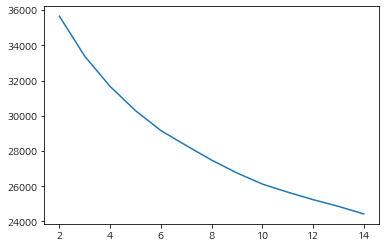

In [4]:
plt.plot(k_range, inertia_arr)

In [6]:
# Silhouette_score

k_range = range(2,20)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1422)
    kmeans.fit(data1)
    clusters = kmeans.predict(data1)
    
    score = silhouette_score(data, clusters)
    print('k:',k,'  score:',score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n:', best_n, '  best score:', best_silhouette_score)

k: 2   score: 0.1322907665534081
k: 3   score: 0.09361171556392064
k: 4   score: 0.09300304471888235
k: 5   score: 0.09272536474871255
k: 6   score: 0.08913039024344593
k: 7   score: 0.08491972171952054
k: 8   score: 0.08535794950287126
k: 9   score: 0.07927926808044894
k: 10   score: 0.08173490111282021
k: 11   score: 0.07897609305647166
k: 12   score: 0.07731336142318433
k: 13   score: 0.0755260109758761
k: 14   score: 0.0786300992954318
k: 15   score: 0.07839318362162925
k: 16   score: 0.08143225054339044
k: 17   score: 0.07629441342915831
k: 18   score: 0.07964522504334162
k: 19   score: 0.08023203150242784
best n: 2   best score: 0.1322907665534081


## 계층적 군집화

In [7]:
from sklearn.cluster import AgglomerativeClustering

linkage = ['single', 'average', 'complete', 'ward']
k_range = range(2,11)
k_silhouette_df = pd.DataFrame(k_range, columns=['k'])

for connect in linkage:
    k_silhouette = []
    print(connect)
    
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, linkage=connect)
        clusters = clustering.fit_predict(data2)
        score = silhouette_score(data2, clusters)
        
        print('k:',k,'  score:',score)
        
        result = [score]
        k_silhouette.append(result)
        
    score_df = pd.DataFrame(k_silhouette, columns=[connect+'_score'])
    k_silhouette_df = pd.concat([k_silhouette_df, score_df], axis=1)
    
k_silhouette_df

single
k: 2   score: 0.4580539512858085
k: 3   score: 0.40322327929836843
k: 4   score: 0.32371424840190544
k: 5   score: 0.20812278751859545
k: 6   score: 0.17716577977177767
k: 7   score: 0.1480020623444263
k: 8   score: 0.11517132897930886
k: 9   score: 0.10576518030709346
k: 10   score: 0.10253373222998005
average
k: 2   score: 0.4580539512858085
k: 3   score: 0.40322327929836843
k: 4   score: 0.32371424840190544
k: 5   score: 0.2809389638864314
k: 6   score: 0.2151111250766897
k: 7   score: 0.17005763800722087
k: 8   score: 0.1510321650864312
k: 9   score: 0.11946786385448474
k: 10   score: 0.1129132598501991
complete
k: 2   score: 0.09129610158613047
k: 3   score: 0.08221009240798094
k: 4   score: 0.06152858505171781
k: 5   score: 0.06030626223881425
k: 6   score: 0.03694549500683073
k: 7   score: 0.040780278059743616
k: 8   score: 0.0358138271600954
k: 9   score: 0.033956825582155646
k: 10   score: 0.03711104676287567
ward
k: 2   score: 0.08497288202029926
k: 3   score: 0.044365

,k,single_score,average_score,complete_score,ward_score
0,2,0.458054,0.458054,0.091296,0.084973
1,3,0.403223,0.403223,0.082210,0.044365
2,4,0.323714,0.323714,0.061529,0.054645
3,5,0.208123,0.280939,0.060306,0.055908
4,6,0.177166,0.215111,0.036945,0.048530
5,7,0.148002,0.170058,0.040780,0.055472
6,8,0.115171,0.151032,0.035814,0.046233
7,9,0.105765,0.119468,0.033957,0.052482
8,10,0.102534,0.112913,0.037111,0.037837
